In [3]:
import numpy as np
import pandas as pd
import scipy.io
from sklearn.cluster import KMeans
XYZ_Coord = scipy.io.loadmat('C:/XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

In [4]:
file='C:/Edge2.csv' #1999000database
XYZ_Edges = pd.read_csv(file,sep=' ',header=None,names=['Start', 'End', 'Distance'])
XYZ_Edges

,Start,End,Distance
0,0,1,25.804969
1,0,2,20.209810
2,0,3,11.132280
3,0,4,0.797637
4,0,5,19.088003
...,...,...,...
1998995,1996,1998,6.489960
1998996,1996,1999,7.106842
1998997,1997,1998,20.788465
1998998,1997,1999,21.006311


In [6]:
XYZ_Edges = pd.read_csv('C:/Edge2.csv', sep=' ', header=None , names=['Start', 'End', 'Distance'])

In [7]:
XYZ_Edges.sort_values(by=['Distance']).reset_index(drop=True)


,Start,End,Distance
0,26,40,0.184379
1,186,194,0.188690
2,1987,1988,0.212916
3,51,81,0.242231
4,1172,1174,0.333840
...,...,...,...
1998995,1635,1991,172.993586
1998996,1635,1994,173.107661
1998997,1635,1974,173.120835
1998998,1635,1973,173.153146


In [8]:
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_E

array([[0.00000000e+00, 1.00000000e+00, 2.58049685e+01],
       [0.00000000e+00, 2.00000000e+00, 2.02098099e+01],
       [0.00000000e+00, 3.00000000e+00, 1.11322796e+01],
       ...,
       [1.99700000e+03, 1.99800000e+03, 2.07884650e+01],
       [1.99700000e+03, 1.99900000e+03, 2.10063106e+01],
       [1.99800000e+03, 1.99900000e+03, 2.38010407e+00]])

In [9]:
XYZ_E

array([[0.00000000e+00, 1.00000000e+00, 2.58049685e+01],
       [0.00000000e+00, 2.00000000e+00, 2.02098099e+01],
       [0.00000000e+00, 3.00000000e+00, 1.11322796e+01],
       ...,
       [1.99700000e+03, 1.99800000e+03, 2.07884650e+01],
       [1.99700000e+03, 1.99900000e+03, 2.10063106e+01],
       [1.99800000e+03, 1.99900000e+03, 2.38010407e+00]])

In [10]:
#Use the following command to install required package.
#conda install python-louvain networkx
#https://python-louvain.readthedocs.io/en/latest/index.html
#https://networkx.github.io/documentation/stable/index.html
import community
import networkx as nx
import matplotlib.pyplot as plt

#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0, len(XYZ_E)):    
    e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i-660690,2] )
    G.add_weighted_edges_from([(e)])    

In [11]:
e #最大原子距離

('1998', '1999', 124.42298697809942)

In [12]:
partition = community.best_partition(G)
size = float(len(set(partition.values())))
print("community:", size)
mod = community.modularity(partition,G)
print("modularity:", mod)

community: 4.0
modularity: 0.04691323089218934


Community 0
['1', '3', '5', '7', '9', '11', '13', '15', '22', '24', '29', '34', '39', '42', '45', '48', '51', '54', '57', '61', '65', '68', '69', '73', '77', '78', '79', '84', '89', '90', '91', '92', '93', '94', '126', '128', '129', '130', '131', '140', '141', '142', '149', '150', '155', '156', '161', '162', '166', '167', '170', '171', '175', '178', '179', '182', '185', '188', '191', '194', '197', '199', '202', '204', '209', '211', '213', '215', '217', '219', '224', '226', '229', '231', '234', '237', '238', '241', '244', '245', '249', '255', '256', '272', '278', '282', '285', '290', '292', '294', '296', '299', '302', '325', '326', '333', '348', '368', '373', '374', '379', '384', '390', '395', '400', '406', '411', '416', '421', '426', '427', '432', '437', '442', '447', '452', '457', '462', '467', '472', '477', '482', '487', '492', '497', '501', '502', '506', '511', '516', '521', '525', '526', '530', '535', '539', '540', '541', '544', '549', '553', '555', '558', '562', '563', '564', '567

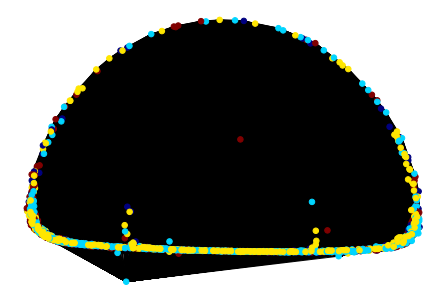

In [13]:
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

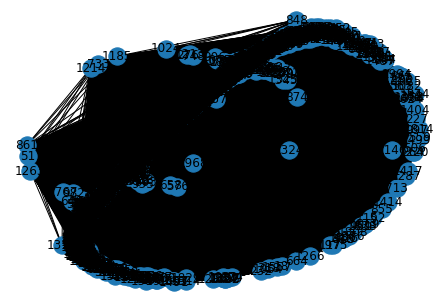

In [14]:
nx.draw(G, with_labels=True)

In [15]:
#assign data point color based on community in realspace
label = np.zeros((len(XYZ_C),1))
labeldata = np.zeros((len(XYZ_C),1))
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i)] == j :            
            label[i] =  j
            labeldata[i] =  i
labeldataRE = np.reshape(labeldata, len(XYZ_C))
labelRE = np.reshape(label, len(XYZ_C))            

In [16]:
label

array([[3.],
       [0.],
       [1.],
       ...,
       [2.],
       [2.],
       [2.]])

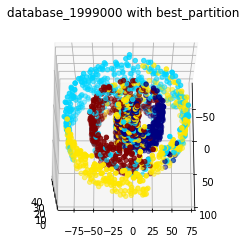

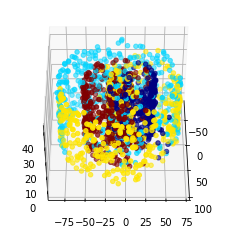

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(70, 0)
plt.title('database_1999000 with best_partition')

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # matplotlib 3.2.0 後可省略
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [19]:
kmeans=KMeans(n_clusters=10,random_state=0)

In [20]:
labeldatak=kmeans.fit(labeldata)
kmeans.labels_


array([2, 2, 2, ..., 5, 5, 5])

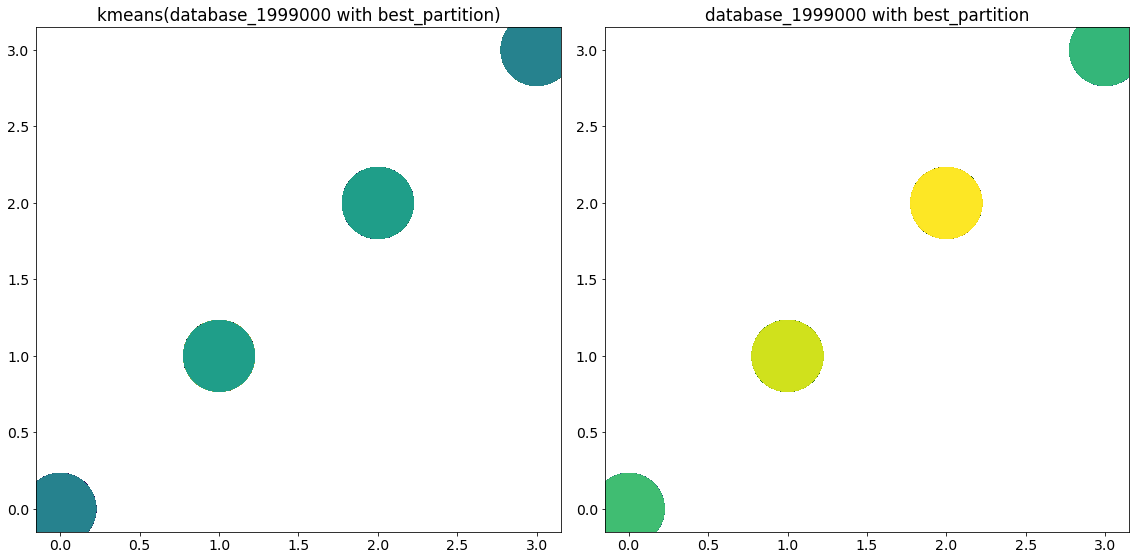

In [21]:
new_dy = kmeans.predict(labeldata)
plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))
# 以不同顏色畫出原始的 10 群資料
plt.subplot(121)
plt.title('kmeans(database_1999000 with best_partition)')
plt.scatter(label[:,0],label[:,0],s=5000,c=kmeans.labels_)# 根據重新分成的 5 組來畫出資料
plt.subplot(122)
plt.title('database_1999000 with best_partition')
plt.scatter(label[:,0],label[:,0],s=5000,c=labeldata)# 顯示圖表
plt.tight_layout()
plt.show()

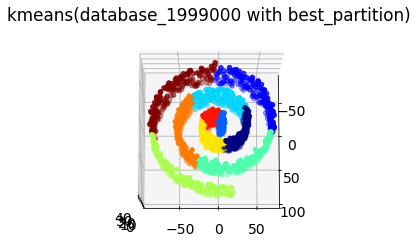

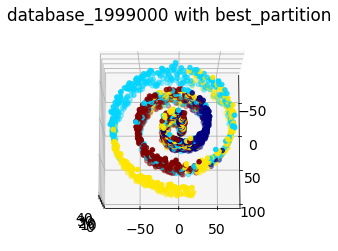

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = kmeans.labels_
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
plt.title('kmeans(database_1999000 with best_partition)')

ax.view_init(80, 0) # kmean後資料

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
plt.title('database_1999000 with best_partition')

ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)#用最大距離後(best partition後資料)

In [23]:
labeldatao=kmeans.fit(XYZ_C)
kmeans.labels_

array([2, 2, 2, ..., 9, 9, 9])

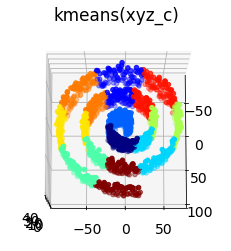

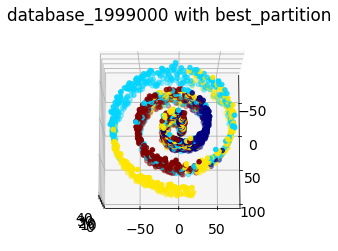

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = kmeans.labels_
plt.title('kmeans(xyz_c)')
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0) #直接用xyz_c Y做kmean，內建即為歐式距離。
fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
plt.title('database_1999000 with best_partition')
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)#用最大距離後(best partition後資料)

In [25]:
labeldatao=kmeans.fit(XYZ_C)
kmeans.labels_

array([2, 2, 2, ..., 9, 9, 9])

In [26]:
labeldataeuo=np.array(kmeans.labels_)

In [27]:
len(labeldataeuo)

2000

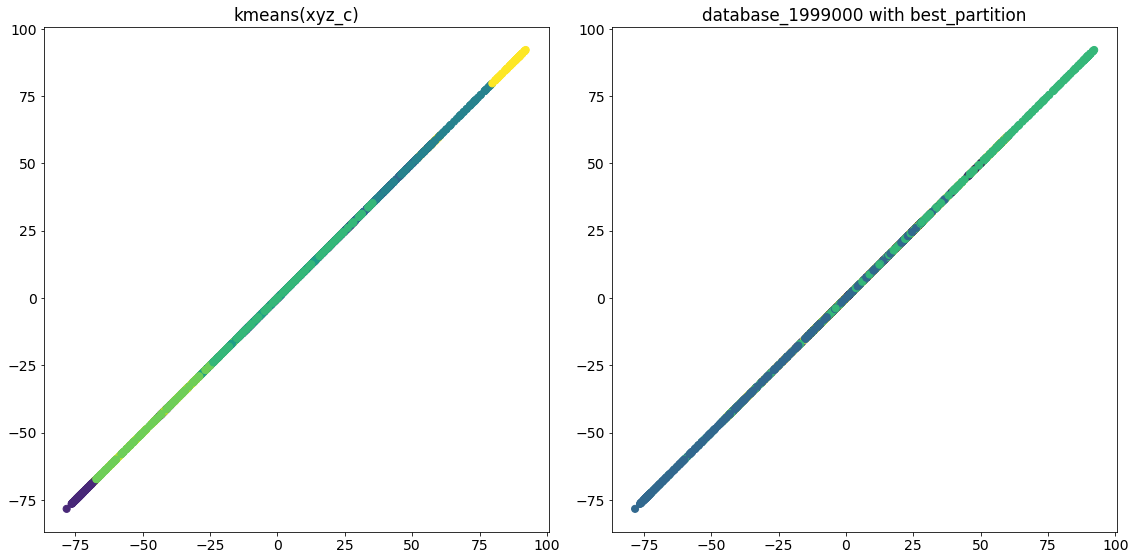

In [28]:
new_dy = kmeans.predict(XYZ_C)
plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))
# 以不同顏色畫出原始的 10 群資料
plt.subplot(121)
plt.title('kmeans(xyz_c)')
plt.scatter(XYZ_C[:,0],XYZ_C[:,0],s=50,c=labeldataeuo)#只用kmean去分xyz_c
plt.subplot(122)
plt.title('database_1999000 with best_partition')
plt.scatter(XYZ_C[:,0],XYZ_C[:,0],s=50,c=label)#
plt.tight_layout()
plt.show()

In [29]:
label

array([[3.],
       [0.],
       [1.],
       ...,
       [2.],
       [2.],
       [2.]])

In [30]:
list(labeldataeuo)

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [31]:
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])